# ĐỒ ÁN CUỐI KỲ: ĐÁNH GIÁ TỰA SÁCH

Người thực hiện: Võ Phương Hòa - 1412192

---

## Tổng quan về đồ án

**Đề tài**

Xuất phát từ nhu cầu đọc sách của con người, thị trường sách hiện nay đã trở nên hết sức phong phú và đa dạng về thể loại, nội dung, tác giả,... Tuy nhiên, sự phong phú về đầu sách cũng dẫn đến khó khăn cho người đọc trong việc tìm đọc một cuốn sách hay hòng tránh lãng phí thời gian và tiền bạc. Từ đó, bài toán đặt ra là làm thế nào người đọc biết được một cuốn sách nên đọc hay không.

**Dữ liệu**

Nguồn dữ liệu được thu thập từ website https://tiki.vn/nha-sach-tiki .

Số mẫu dữ liệu:
    + Training set: 20000 mẫu
    + Validation set: 4705 mẫu
    + Test set: 5000 mẫu

Số thuộc tính: 10

Các thuộc tính:
    + id: Mã số của sách
    + title: Tên sách
    + topic: Chủ đề cuốn sách
    + nxb: Tên nxb cuốn sách
    + author: Tác giả cuốn sách
    + date: Ngày xuất bản
    + review: Số lượt nhận xét
    + rating_Count: Số lượt đánh giá
    + rating
    + price: Giá tiền cuốn sách (sau khi trừ phần giảm giá)

**Tiền xử lý dữ liệu**

    1. Loại bỏ 3 thuộc tính không cần thiết (id, title và review).
    2. Chuyển kiểu dữ liệu từ dạng chuỗi sang dạng numeric đối với các thuộc tính topic, nxb, author và date.
    3. Chuẩn hóa các cột dữ liệu sao cho mean = 0, std = 1.

**Giải quyết bài toán**

    + Phương pháp: ANN (Artificial Neural Network)
    + Thuật toán: SGD (Stochastic Gradient Descent) + Backpropagation Algo
    + Activation function: Sigmoid (đối với tầng ẩn) và Softmax (đối với tầng output)
    + Cost function: Mean Negative Log Likelihood
    + Error function: Mean Binary Error
    + Regularization: Weight Decay/Early Stopping

## Import

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Đọc dữ liệu tập huấn luyện và tập validation vào data frame

In [2]:
train_df = pd.read_csv('train.csv', index_col=0)
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 103 to 29424
Data columns (total 10 columns):
author          20000 non-null object
date            20000 non-null object
id              20000 non-null int64
nxb             20000 non-null object
price           20000 non-null int64
rating          20000 non-null float64
rating_Count    20000 non-null int64
review          20000 non-null int64
title           20000 non-null object
topic           20000 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 1.7+ MB


,author,date,id,nxb,price,rating,rating_Count,review,title,topic
103,Gào,12-2012,52446,NXB Thời Đại,63000,3.4,36,0,Ký Ức Northumbria.,Tiểu Thuyết Tình Cảm Lãng Mạn
521,Tatsuhiko Takimoto,08-2015,150791,NXB Văn Học,56000,4.4,146,0,Chào Mừng Đến Với N.H.K!.,Tiểu Thuyết Tình Cảm Lãng Mạn
1964,Tatsuhiko Takimoto,08-2015,150791,NXB Văn Học,56000,4.4,146,0,Chào Mừng Đến Với N.H.K!.,Văn Học Nước Ngoài
3298,GCT - Apple,08-2015,151238,NXB Phụ Nữ,55300,4.7,46,0,Trời Xanh của Táo,Truyện ngắn - Tản văn
1425,Mori Eto,03-2016,185906,NXB Hội Nhà Văn,56000,4.6,270,0,Colorful.,Văn Học Nước Ngoài


In [3]:
val_df = pd.read_csv('val.csv', index_col=0)
val_df.info()
val_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4705 entries, 6564 to 23713
Data columns (total 10 columns):
author          4705 non-null object
date            4705 non-null object
id              4705 non-null int64
nxb             4705 non-null object
price           4705 non-null int64
rating          4705 non-null float64
rating_Count    4705 non-null int64
review          4705 non-null int64
title           4705 non-null object
topic           4705 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 404.3+ KB


,author,date,id,nxb,price,rating,rating_Count,review,title,topic
6564,Nhiều Tác Giả,12-2016,563593,NXB Trẻ,26000,0.0,0,0,Mỗi Ngày Một Mẩu Chuyện Hay -...,Văn Học Thiếu Nhi
811,Hồ Anh Thái (tuyển),12-2016,563594,NXB Trẻ,63000,0.0,0,0,Văn Mới 2015 - 2016,Văn Học Việt Nam
23814,Kanoko Sakurakouji,12-2016,563606,NXB Trẻ,18000,0.0,0,0,Black Bird - Tập 06,"Truyện Tranh, Manga, Comic"
19285,Vũ Thị Phượng,12-2016,563623,NXB Thanh Niên,69000,0.0,0,0,Giải Sách Bài Tập Tiêng Anh Lớp 6,Sách Tham Khảo
19286,Võ Thị Minh Trang,12-2016,563631,NXB Thanh Niên,69000,0.0,0,0,Giải Tiếng Việt Lớp 3 (Tập 2A),Sách Tham Khảo


## Tiền xử lý

**1. Tiền xử lý tập huấn luyện**

In [4]:
train_input_df = pd.DataFrame(train_df)
train_input_df.drop(['rating'], axis=1, inplace=True)
train_output_df = train_df.rating

**1.1. Xây dựng `train_X` từ `train_input_df`**

Loại bỏ 2 thuộc tính không cần thiết cho quá trình huấn luyện dữ liệu là 'id', 'title'. Ngoài ra, loại bỏ luôn thuộc tính 'review' vì có quá nhiều giá trị = 0 (gần như mọi giá trị thuộc cột review = 0), ảnh hưởng đến việc tính toán mean và std sau này.

In [5]:
dropped_cols = ['id', 'title', 'review']
train_input_df.drop(dropped_cols, axis=1, inplace=True)
train_input_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 103 to 29424
Data columns (total 6 columns):
author          20000 non-null object
date            20000 non-null object
nxb             20000 non-null object
price           20000 non-null int64
rating_Count    20000 non-null int64
topic           20000 non-null object
dtypes: int64(2), object(4)
memory usage: 1.1+ MB


Chuẩn hóa dữ liệu các cột 'author', 'date', 'nxb', 'topic' về dạng numeric bằng cách thống kê số mẫu khác nhau của từng cột, đánh số từ 0 -> n - 1 tương ứng với từng mẫu (với n là số mẫu khác nhau của mỗi cột, mỗi cột sẽ có một giá trị n khác nhau).

In [6]:
train_author = train_input_df.author.unique().tolist()
train_nxb = train_input_df.nxb.unique().tolist()
train_date = train_input_df.date.unique().tolist()
train_topic = train_input_df.topic.unique().tolist()

train_li_attitude = [train_author, train_nxb, train_date, train_topic]

In [7]:
def normalize_to_numeric(train_input_df, li_attitude):
    '''
    Normalize columns of a data frame from datatype is object to datatype is numeric.
    
    Parameters
    ----------
    train_input_df : data frame
        The data frame containing training inputs.
    
    Returns
    -------
    normalize_input_df: data frame
        The data frame has all of columns has datatype is numeric.
    '''
    #
    normalize_input_df = pd.DataFrame(train_input_df)
    
    normalize_input_df = normalize_input_df.assign(new_author = lambda x: 0.0)
    normalize_input_df = normalize_input_df.assign(new_nxb = lambda x: 0.0)
    normalize_input_df = normalize_input_df.assign(new_date = lambda x: 0.0)
    normalize_input_df = normalize_input_df.assign(new_topic = lambda x: 0.0)
     
    for i in normalize_input_df.author.index:
        try:
            normalize_input_df.new_author.set_value(i, li_attitude[0].index(normalize_input_df.author[i]))
        except:
            normalize_input_df.new_author.set_value(i, len(li_attitude[0]))
            li_attitude[0].append(normalize_input_df.author[i])
        try:
            normalize_input_df.new_nxb.set_value(i, li_attitude[1].index(normalize_input_df.nxb[i]))
        except:
            normalize_input_df.new_nxb.set_value(i, len(li_attitude[1]))
            li_attitude[1].append(normalize_input_df.nxb[i])
        try:
            normalize_input_df.new_date.set_value(i, li_attitude[2].index(normalize_input_df.date[i]))
        except:
            normalize_input_df.new_date.set_value(i, len(li_attitude[2]))
            li_attitude[2].append(normalize_input_df.date[i])
        try:
            normalize_input_df.new_topic.set_value(i, li_attitude[3].index(normalize_input_df.topic[i]))
        except:
            normalize_input_df.new_topic.set_value(i, len(li_attitude[3]))
            li_attitude[3].append(normalize_input_df.topic[i])
            
    normalize_input_df.drop(['author', 'nxb', 'date', 'topic'], axis=1, inplace=True)
    
    return normalize_input_df, li_attitude

In [8]:
train_input_df, train_li_attitude = normalize_to_numeric(train_input_df, train_li_attitude)
train_input_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 103 to 29424
Data columns (total 6 columns):
price           20000 non-null int64
rating_Count    20000 non-null int64
new_author      20000 non-null float64
new_nxb         20000 non-null float64
new_date        20000 non-null float64
new_topic       20000 non-null float64
dtypes: float64(4), int64(2)
memory usage: 1.1 MB


Xây dựng `train_X`. Để giúp Gradient Descent hội tụ nhanh hơn, ta sẽ chuẩn hóa để các cột của `train_X` có mean bằng 0 và có độ lệch chuẩn bằng 1. *Khi chuẩn hóa `val_X`/`test_X`, ta sẽ dùng mean và độ lệch chuẩn được ước lượng từ tập huấn luyện.*

In [9]:
train_X = train_input_df.values
print train_X.shape

(20000L, 6L)


In [10]:
# compute `X_mean` and `X_std`
X_mean = np.mean(train_X, axis = 0)
X_std = np.std(train_X, axis = 0)

In [11]:
print X_mean
print X_std

[  8.00396740e+04   5.33989500e+01   1.64009865e+03   2.08882500e+01
   8.79989000e+01   1.65818500e+01]
[  1.46758096e+05   2.19415404e+03   1.60308771e+03   2.01233735e+01
   6.45248200e+01   1.16693530e+01]


In [12]:
# normalize train_X using X_mean and X_std
train_X -= X_mean
train_X /= X_std

In [13]:
print train_X.mean(axis=0)
print train_X.std(axis=0)

[  5.68434189e-18   4.26325641e-18   2.27373675e-17   4.54747351e-17
  -1.02318154e-16   5.68434189e-17]
[ 1.  1.  1.  1.  1.  1.]


In [14]:
# Add x_0 column
train_X = np.hstack([np.ones((len(train_X), 1)), train_X])
print train_X.shape

(20000L, 7L)


**1.2. Xây dựng `train_Y` từ `train_output_df`**

In [15]:
train_Y = np.array([int(i) for i in train_output_df.values]).reshape(-1, 1)
print train_Y.shape

(20000L, 1L)


**2. Tiền xử lý tập validation**

In [16]:
val_input_df = pd.DataFrame(val_df)
val_input_df.drop(['rating'], axis=1, inplace=True)
val_output_df = val_df.rating

**2.1. Xây dựng `val_X` từ `val_input_df`**

In [17]:
def process_new_input_df(new_input_df, dropped_cols, X_mean, X_std, li_attitude):
    '''
    Builds `new_X` from `new_input_df`:
    1. Drop columns using `dropped_cols` (`dropped_cols` is the list containing names of dropped columns)
    2. Normalize columns has datatype is object to datatype is numeric with normalize_to_numeric function
    3. Subtract by `X_mean` and divide by `X_std`
    4. Add `x_0` column
    
    Parameters
    ----------
    ....
    
    Returns
    -------
    new_X : numpy array
        The matrix of input vectors.
    '''
    # TODO
    new_X = pd.DataFrame(new_input_df)
    new_X.drop(dropped_cols, axis=1, inplace=True)
    new_X, li_attitude = normalize_to_numeric(new_X, li_attitude)
    new_X -= X_mean
    new_X /= X_std
    new_X = np.hstack([np.ones((len(new_X), 1)), new_X])
    
    return new_X, li_attitude

In [18]:
val_X, train_li_attitude = process_new_input_df(val_input_df, ['id', 'title', 'review'], X_mean, X_std, train_li_attitude)
val_X.shape

(4705L, 7L)

**2.2. Xây dựng `val_Y` từ `val_output_df`**

In [19]:
val_Y = np.array([int(i) for i in val_df.rating.values]).reshape(-1, 1)
val_Y.shape

(4705L, 1L)

## Huấn luyện

**Hàm tính output của Neural Net**

Ở đây, ta dùng hàm kích hoạt sigmoid ở các tầng ẩn, và hàm softmax ở tầng cuối.

In [20]:
def sigmoid(S):
    '''
    Computes sigmoid function for each element of array S.
    '''
    return 1 / (1 + np.exp(-S))
def softmax(S):
    '''
    Computes softmax function for each row of array S.
    '''
    A = np.exp(S)
    A /= A.sum(axis=1, keepdims=True)
    return A
def compute_nnet_outputs(Ws, X, need_all_layer_outputs):
    '''
    Computes the outputs of Neural Net by forward propagating X through the net.
    
    Parameters
    ----------
    Ws : list of numpy arrays
        Ws[l-1] is W of layer l with l >= 1 (layer 0 is input layer; it doesn't have W);
        W of layer l will have the shape of (d^(l-1)+1, d^(l)), where 
        d^(l-1) is the number of neurons (not count the +1 neuron) of layer l-1 and 
        d^(l) is the number of neurons (not count the +1 neuron) of layer l.
    X : numpy array, shape (N, d+1)
        The matrix of input vectors (each row corresponds to an input vector); 
        the first column of this matrix is all ones (corresponding to x_0).
    need_all_layer_outputs : bool
        If this var is true, we'll return a list of layer's-outputs; 
        otherwise, we'll return the final layer's output.
    
    Returns
    -------
    If `need_all_layer_outputs` is false, return
        A : numpy array, shape (N, K=10)
            The maxtrix of output vectors of final layer; each row is an output vector (containing 
            each class's probability given the corresponding input vector).
    Else, return
        As : list of numpy arrays
            As[l] is the matrix of output vectors of layer l; each row is an output vector (corresponding 
            to an input vector).
    '''    
    # TODO
    As = [X]
    for ws in Ws:
        As.append(np.zeros(shape = (len(X), ws.shape[1])))
    
    for i in range(1, len(As) - 1):
        As[i] = np.hstack([np.ones((len(X), 1)), sigmoid(np.dot(As[i - 1], Ws[i - 1]))])
    As[-1] = softmax(np.dot(As[-2], Ws[-1]))
    
    if need_all_layer_outputs:
        return As
    
    return As[-1]

**Hàm huấn luyện Neural Net** (sử dụng early stopping và weight decay)

In [55]:
def train_nnet(train_X, train_Y, val_X, val_Y, hid_layer_sizes, wd_level,
               mb_size, learning_rate, max_patience, max_epoch=1000000, momentum_param=0.):
    '''
    Trains Neural Net on the dataset (X, Y).
    Cost function: mean negative log likelihood + weight decay.
    Optimization algorithm: SGD; stopping criteria: early stopping and/or max epoch.
    
    Parameters
    ----------
    X : numpy array, shape (N, d + 1)
        The matrix of input vectors (each row corresponds to an input vector); 
        the first column of this matrix is all ones (corresponding to x_0).
    Y : numpy array, shape (N, 1)
        The vector of outputs.
    hid_layer_sizes : list
        The list of hidden layer sizes; e.g., hid_layer_sizes = [20, 10] means: 
        the Net has 2 hidden layers, the 1st one has 20 neurons, and the 2nd one has 
        10 neurons (not count the +1 neurons).
    wd_level : float
        The level (coefficient) of weight decay.
    mb_size : int
        Minibatch size of SGD.
    learning_rate : float
        Learning rate of SGD.
    max_patience : int (> 0) or None
        The parameter of early stopping. We'll have a `patience` variable with initial value equal to
        `max_patience`. During the training, we'll keep track of the best MBE (Mean Binary Error) 
        on the validation set; if the MBE on the validation set at the current epoch < the current 
        best one, we'll reset `patience` to `max_patience`; otherwise, `patience` -= 1. 
        When `patience` = 0 or `max_epoch` is reached, we'll terminate SGD.
        If `max_patience` is None, we don't use early stopping.
    max_epoch : int, default 1000000
        We'll terminate SGD after this number of epochs or when `patience` = 0 (if early stopping is used).
    
    Returns
    -------
    Ws : list of numpy arrays
        Ws[l-1] is W of layer l with l >= 1 (layer 0 is input layer; it doesn't have W);
        W of layer l will have the shape of (d^(l-1)+1, d^(l)), where 
        d^(l-1) is the number of neurons (not count the +1 neuron) of layer l-1 and 
        d^(l) is the number of neurons (not count the +1 neuron) of layer l.
        *If `max_patience` is None, Ws are weights after the final epoch (as previous homeworks); 
        otherwise, Ws are weights corresponding to the best MBE on the validation set.*
    train_errs : list, len = num epochs spent on training
        The list of MBEs on the training set after each epoch.
    val_errs : list, len = num epochs spent on training
        The list of MBEs on the validation set after each epoch.
    
    Notes
    -----
    After each *100-epochs* (in the experiments below, you'll not want to print after each single epoch), 
    you need to print out: 
    - The MBE on the training set and validation set (regardless of `max_patience`).
    - The value of `patience` (if `max_patience` is not None).
    E.g., `Epoch ..., training err ..., val err ..., patience ...` (in this case, `max_patience` is not None).
    
    After the training, you need to print out the info of returned Ws:
    - The corresponding epoch.
    - The corresponding MBE on the training set and validation set.
    E.g., `Info of returned Ws: epoch ..., train err ..., val err ...`.
    '''
    # Init Ws
    K = len(np.unique(train_Y)) # Num classes
    layer_sizes = [train_X.shape[1] - 1] + hid_layer_sizes + [K]
    np.random.seed(0) # This will fix the randomization; so, you and me will have the same results
    Ws = [np.random.randn(layer_sizes[l]+1, layer_sizes[l+1]) / np.sqrt(layer_sizes[l]+1) 
          for l in range(len(layer_sizes)-1)]

    
    # TODO
    one_hot_Y = np.zeros((len(train_Y), K))
    one_hot_Y[np.arange(len(train_Y)), train_Y.reshape(-1)] = 1
    costs = [] # To save costs during training
    train_errs = [] # To save mean binary errors during training
    val_errs = [] # To save mean binary errors during training
    N = len(train_X) # Num training examples
    rnd_idxs = range(N) # Random indexes
    
    #
    patience = max_patience
    best_MBE = 100.0
    idx_best_MBE = -1
    _Ws = [np.zeros(ws.shape) for ws in Ws]
    
    # Train
    for epoch in range(max_epoch):
        np.random.shuffle(rnd_idxs)
        for start_idx in range(0, N, mb_size):
            # Get minibach
            mb_X = train_X[rnd_idxs[start_idx:start_idx+mb_size]]
            mb_Y = one_hot_Y[rnd_idxs[start_idx:start_idx+mb_size]]
            
            # Forward-prop
            As = compute_nnet_outputs(Ws, mb_X, True)
                 
            # Back-prop; on the way, compute each layer's gradient and update its W
            # TODO: delta = ...
            delta = (As[-1] - mb_Y) / len(mb_Y)
            # TODO: grad = ...
            grad = np.dot(As[-2].T, delta)
            Ws[-1] = Ws[-1] - (learning_rate * grad) - (2 * wd_level * learning_rate * Ws[-1])
            for i in range(2, len(Ws) + 1):
                delta = delta.dot(Ws[-i + 1].T[:, 1:]) * As[-i][:, 1:] * (1 - As[-i][:, 1:])
                # TODO: grad = ...
                grad = np.dot(As[-i - 1].T, delta)
                Ws[-i] = Ws[-i] - (learning_rate * grad) - (2 * wd_level * learning_rate * Ws[-i])
        
        # Compute training info, save it, and print it
        A = compute_nnet_outputs(Ws, train_X, False)
        B = compute_nnet_outputs(Ws, val_X, False)
        weight_decay = wd_level*np.sum((np.sum(s) for s in np.array([ws*ws for ws in Ws])))/2
        cost = np.mean(-np.sum(train_Y * np.log(A))) + weight_decay
        train_err = np.mean(np.argmax(A, axis=1) != train_Y.squeeze()) * 100
        val_err = np.mean(np.argmax(B, axis=1) != val_Y.squeeze()) * 100
        costs.append(cost)
        train_errs.append(train_err)
        val_errs.append(val_err)
            
        if epoch % 100 == 99:
            print 'Epoch %4d, train err %.3f, val err %.3f' %(epoch, train_err, val_err),
            if max_patience != None:
                print ', patience %4d' % (patience)
            else:
                print
        
            
        if max_patience != None:
            if val_err < best_MBE:
                best_MBE = val_err
                idx_best_MBE = epoch
                patience = max_patience
                _Ws = Ws
            else:
                patience -= 1
                if patience == 0:
                    Ws = _Ws
                    max_epoch = idx_best_MBE + 1
                    break
            
    print 'Info of returned Ws: epoch %4d, train err %.3f, val err %.3f' %(max_epoch-1,
                                                                           train_errs[idx_best_MBE],
                                                                           val_errs[idx_best_MBE])
        
    return Ws, train_errs, val_errs

**Thí nghiệm 1: ảnh hưởng của weight decay**

Cố định các giá trị `hid_layer_sizes=[50], mb_size=40, learning_rate=0.0005, max_patience=None, max_epoch=5000`.
Huấn luyện mô hình với weight decay lần lượt là : 0.000, 0.001, 0.005.

In [49]:
Ws_0, train_errs_0, val_errs_0 = train_nnet(train_X, train_Y, val_X, val_Y, hid_layer_sizes=[50], 
                                            wd_level=0.0, mb_size=40, learning_rate=0.0005, 
                                            max_patience=None, max_epoch=5000)

Epoch   99, train err 41.315, val err 17.853
Epoch  199, train err 41.370, val err 19.915
Epoch  299, train err 41.430, val err 19.766
Epoch  399, train err 41.275, val err 19.745
Epoch  499, train err 41.310, val err 19.554
Epoch  599, train err 41.225, val err 19.150
Epoch  699, train err 41.085, val err 18.746
Epoch  799, train err 40.825, val err 17.853
Epoch  899, train err 40.625, val err 17.705
Epoch  999, train err 40.465, val err 17.450
Epoch 1099, train err 40.375, val err 17.535
Epoch 1199, train err 40.235, val err 17.343
Epoch 1299, train err 40.170, val err 17.365
Epoch 1399, train err 39.945, val err 17.450
Epoch 1499, train err 39.555, val err 17.683
Epoch 1599, train err 39.315, val err 17.726
Epoch 1699, train err 39.220, val err 17.726
Epoch 1799, train err 38.865, val err 18.066
Epoch 1899, train err 38.790, val err 18.172
Epoch 1999, train err 38.725, val err 18.300
Epoch 2099, train err 38.780, val err 18.342
Epoch 2199, train err 38.700, val err 18.427
Epoch 2299

In [50]:
Ws_1, train_errs_1, val_errs_1 = train_nnet(train_X, train_Y, val_X, val_Y, hid_layer_sizes=[50], 
                                            wd_level=0.001, mb_size=40, learning_rate=0.0005, 
                                            max_patience=None, max_epoch=5000)

Epoch   99, train err 41.395, val err 17.620
Epoch  199, train err 41.425, val err 19.490
Epoch  299, train err 41.350, val err 19.532
Epoch  399, train err 41.435, val err 19.787
Epoch  499, train err 41.460, val err 19.809
Epoch  599, train err 41.465, val err 19.660
Epoch  699, train err 41.450, val err 19.745
Epoch  799, train err 41.320, val err 19.575
Epoch  899, train err 41.345, val err 19.532
Epoch  999, train err 41.335, val err 19.532
Epoch 1099, train err 41.330, val err 19.724
Epoch 1199, train err 41.325, val err 19.894
Epoch 1299, train err 41.350, val err 19.617
Epoch 1399, train err 41.325, val err 19.787
Epoch 1499, train err 41.330, val err 19.787
Epoch 1599, train err 41.330, val err 19.787
Epoch 1699, train err 41.325, val err 19.787
Epoch 1799, train err 41.355, val err 19.894
Epoch 1899, train err 41.340, val err 19.851
Epoch 1999, train err 41.350, val err 20.021
Epoch 2099, train err 41.360, val err 19.894
Epoch 2199, train err 41.365, val err 20.191
Epoch 2299

In [51]:
Ws_2, train_errs_2, val_errs_2 = train_nnet(train_X, train_Y, val_X, val_Y, hid_layer_sizes=[50], 
                                            wd_level=0.005, mb_size=40, learning_rate=0.0005, 
                                            max_patience=None, max_epoch=5000)

Epoch   99, train err 41.285, val err 16.663
Epoch  199, train err 41.360, val err 17.109
Epoch  299, train err 41.380, val err 16.897
Epoch  399, train err 41.355, val err 16.982
Epoch  499, train err 41.370, val err 16.833
Epoch  599, train err 41.415, val err 16.833
Epoch  699, train err 41.395, val err 17.024
Epoch  799, train err 41.435, val err 16.684
Epoch  899, train err 41.425, val err 16.684
Epoch  999, train err 41.445, val err 16.642
Epoch 1099, train err 41.435, val err 16.663
Epoch 1199, train err 41.415, val err 16.918
Epoch 1299, train err 41.540, val err 16.599
Epoch 1399, train err 41.435, val err 16.706
Epoch 1499, train err 41.435, val err 16.706
Epoch 1599, train err 41.460, val err 16.663
Epoch 1699, train err 41.435, val err 16.684
Epoch 1799, train err 41.445, val err 16.897
Epoch 1899, train err 41.440, val err 16.706
Epoch 1999, train err 41.415, val err 17.194
Epoch 2099, train err 41.450, val err 16.684
Epoch 2199, train err 41.395, val err 17.152
Epoch 2299

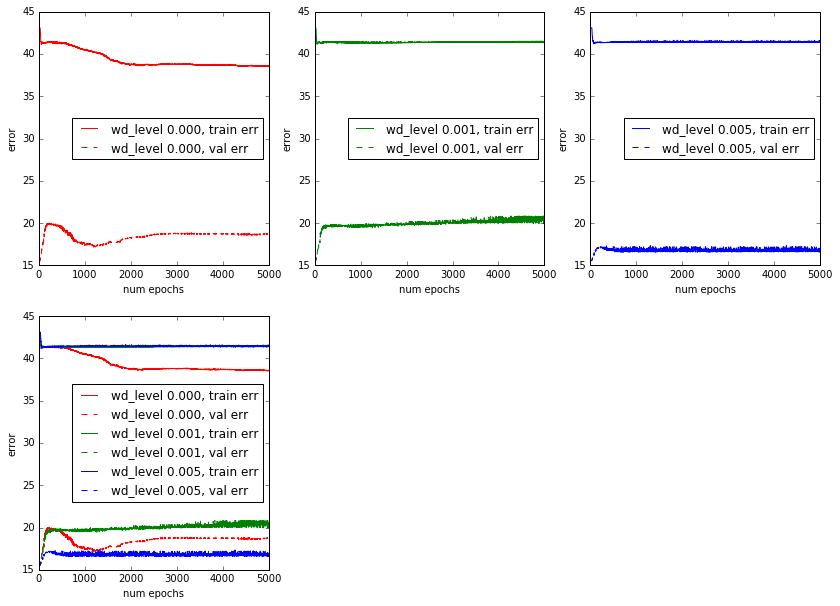

In [52]:
# Visualize results

plt.figure(figsize=(14,10))
num_epochs = len(train_errs_0)

plt.subplot(2, 3, 1)
plt.plot(range(num_epochs), train_errs_0, 'r', label='wd_level 0.000, train err')
plt.plot(range(num_epochs), val_errs_0, 'r--', label='wd_level 0.000, val err')
plt.xlabel('num epochs')
plt.ylabel('error')
plt.legend(loc='best')


plt.subplot(2, 3, 2)
plt.plot(range(num_epochs), train_errs_1, 'g', label='wd_level 0.001, train err')
plt.plot(range(num_epochs), val_errs_1, 'g--', label='wd_level 0.001, val err')
plt.xlabel('num epochs')
plt.ylabel('error')
plt.legend(loc='best')

plt.subplot(2, 3, 3)
plt.plot(range(num_epochs), train_errs_2, 'b', label='wd_level 0.005, train err')
plt.plot(range(num_epochs), val_errs_2, 'b--', label='wd_level 0.005, val err')
plt.xlabel('num epochs')
plt.ylabel('error')
plt.legend(loc='best')

plt.subplot(2, 3, 4)
plt.plot(range(num_epochs), train_errs_0, 'r', label='wd_level 0.000, train err')
plt.plot(range(num_epochs), val_errs_0, 'r--', label='wd_level 0.000, val err')
plt.plot(range(num_epochs), train_errs_1, 'g', label='wd_level 0.001, train err')
plt.plot(range(num_epochs), val_errs_1, 'g--', label='wd_level 0.001, val err')
plt.plot(range(num_epochs), train_errs_2, 'b', label='wd_level 0.005, train err')
plt.plot(range(num_epochs), val_errs_2, 'b--', label='wd_level 0.005, val err')
plt.xlabel('num epochs')
plt.ylabel('error')
plt.legend(loc='best')


**Thí nghiệm 2: ảnh hưởng của early stopping**

Cố định `hid_layer_sizes=[50], wd_level=0.0, mb_size=40, learning_rate=0.1, max_epoch=1000000(default).

Chọn max_patience = 3000

In [ ]:
Ws_3, train_errs_3, val_errs_3 = train_nnet(train_X, train_Y, val_X, val_Y, hid_layer_sizes=[50], 
                                            wd_level=0.0, mb_size=40, learning_rate=0.1, 
                                            max_patience=3000)

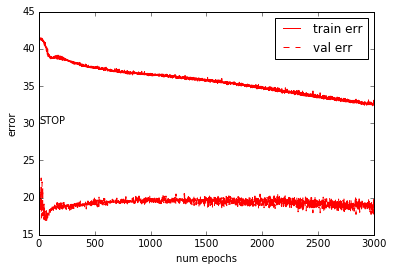

In [62]:
# Visualize results
num_epochs = len(train_errs_3)
stop_epoch = np.argmin(val_errs_3)
plt.plot(range(num_epochs), train_errs_3, 'r', label='train err')
plt.plot(range(num_epochs), val_errs_3, 'r--', label='val err')
min_y, max_y = plt.ylim()
plt.plot([stop_epoch, stop_epoch], [min_y, max_y])
plt.xlabel('num epochs')
plt.ylabel('error')
plt.legend(loc='best')
plt.text(stop_epoch, (min_y + max_y) / 2, 'STOP')

## Kiểm tra (test)

**1. Đọc dữ liệu tập kiểm tra vào data frame `test_input_df`**

In [ ]:
test_input_df = pd.read_csv('test.csv', index_col=0)

**2. Xây dựng `test_X` từ `test_input_df`**

In [ ]:
test_X, _ = process_new_input_df(test_input_df, ['id', 'title', 'review', 'rating'] , X_mean, X_std, train_li_attitude)
test_Y = np.array([int(i) for i in test_input_df.rating.values]).reshape(-1, 1)

**3. Dự đoán nhãn lớp của test_X**

In [ ]:
# Predict
preds = np.argmax(compute_nnet_outputs(Ws_3, test_X, False), axis=1)
per = np.sum([(p==y) for p, y in zip(preds, test_Y.T[0])])*100.0/len(preds)
print 'Performance is %.3f%%' % (per)